In [25]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [27]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [28]:
from citipy import citipy

In [29]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

iqaluit ca
upernavik gl
broome au
castro cl
velykyy burluk ua
punta arenas cl
saint-francois gp
bluff nz
bathsheba bb
udaipura in
illoqqortoormiut gl
koumac nc
chokurdakh ru
van wert us
umzimvubu za
axim gh
longyearbyen sj
birin dz
nizhneyansk ru
traverse city us
ushuaia ar
albany au
la ronge ca
cidreira br
severo-kurilsk ru
busselton au
nizhniy kuranakh ru
bordighera it
klaksvik fo
puerto ayora ec
chernyshevskiy ru
mataura pf
bangaon in
albany au
petropavlovsk-kamchatskiy ru
saint-philippe re
cabo san lucas mx
guerrero negro mx
minab ir
mahon es
butaritari ki
touros br
ushuaia ar
isangel vu
boryslav ua
itarema br
hazro pk
yellowknife ca
westport ie
bredasdorp za
bredasdorp za
devonport au
grand river south east mu
khatanga ru
barrow us
wahran dz
taolanaro mg
tuatapere nz
luganville vu
bluff nz
hithadhoo mv
kodiak us
tucuman ar
okhotsk ru
nome us
caravelas br
airai pw
krasnaya gorka ru
busselton au
bilibino ru
dikson ru
rikitea pf
ushuaia ar
paso de carrasco uy
taolanaro mg
tura ru
cly

grand river south east mu
bambous virieux mu
hermanus za
dickinson us
kavieng pg
port elizabeth za
rikitea pf
busselton au
pangody ru
tagusao ph
esperance au
hithadhoo mv
east london za
rikitea pf
chuy uy
busselton au
kayerkan ru
arraial do cabo br
mataura pf
east london za
hilo us
barentsburg sj
albany au
rolim de moura br
vaini to
taolanaro mg
vaini to
kapaa us
bongandanga cd
mirante do paranapanema br
rikitea pf
marzuq ly
georgetown sh
necochea ar
mar del plata ar
fairbanks us
marrakesh ma
meulaboh id
ushuaia ar
hermanus za
port lincoln au
saint-philippe re
mataura pf
sulangan ph
sakakah sa
bambous virieux mu
cotabato ph
avarua ck
atuona pf
louisbourg ca
puerto ayora ec
saint george bm
barrow us
saint-philippe re
bandarbeyla so
yarada in
sandpoint us
saint-francois gp
waitara nz
ushuaia ar
busselton au
hobart au
viedma ar
gamba ga
bredasdorp za
tasiilaq gl
mecca sa
maraa br
souillac mu
tumannyy ru
saint-philippe re
pochutla mx
new norfolk au
matamoros mx
pevek ru
tongchuan cn
chokur

punta arenas cl
puerto del rosario es
jamestown sh
palmer us
geraldton au
panjab af
bharatpur np
kaeo nz
busselton au
tuktoyaktuk ca
bonavista ca
illoqqortoormiut gl
nizhneyansk ru
leh in
torbay ca
dariba in
honiara sb
lebu cl
hermanus za
hobart au
ilulissat gl
samusu ws
port elizabeth za
mataura pf
butaritari ki
le pont-de-claix fr
jiddah sa
samarai pg
el reno us
hobart au
rikitea pf
inhambane mz
hermanus za
ushuaia ar
mataura pf
tumannyy ru
amderma ru
rikitea pf
upernavik gl
kiama au
te anau nz
ponta do sol cv
ushuaia ar
kapaa us
palana ru
chuy uy
lagoa pt
auki sb
narsaq gl
mys shmidta ru
bluff nz
biskamzha ru
taolanaro mg
pevek ru
punta arenas cl
bonthe sl
albany au
morondava mg
zyryanskoye ru
ribeira grande pt
siniscola it
vaini to
busselton au
matara lk
cardoso br
port elizabeth za
cacapava do sul br
taolanaro mg
wairoa nz
atuona pf
urusha ru
cherskiy ru
illoqqortoormiut gl
taolanaro mg
katsuura jp
broome au
shelburne ca
sinnamary gf
jamestown sh
luderitz na
upernavik gl
rio galle

In [30]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

635

In [31]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [32]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67cd371b0353fe34afec386ecf76944f


In [33]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [34]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | upernavik
Processing Record 3 of Set 1 | broome
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | velykyy burluk
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | saint-francois
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | bathsheba
Processing Record 10 of Set 1 | udaipura
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | koumac
Processing Record 13 of Set 1 | chokurdakh
Processing Record 14 of Set 1 | van wert
Processing Record 15 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 16 of Set 1 | axim
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | birin
Processing Record 19 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 20 of Set 1 | traverse city
Processing Record 21 

City not found. Skipping...
Processing Record 37 of Set 4 | saskylakh
Processing Record 38 of Set 4 | bambous virieux
Processing Record 39 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 40 of Set 4 | kuusamo
Processing Record 41 of Set 4 | conceicao do araguaia
Processing Record 42 of Set 4 | taki
Processing Record 43 of Set 4 | plettenberg bay
Processing Record 44 of Set 4 | bell ville
Processing Record 45 of Set 4 | faya
Processing Record 46 of Set 4 | la orilla
Processing Record 47 of Set 4 | aljezur
Processing Record 48 of Set 4 | hohhot
Processing Record 49 of Set 4 | arlit
Processing Record 50 of Set 4 | sinop
Processing Record 1 of Set 5 | nuuk
Processing Record 2 of Set 5 | saint anthony
Processing Record 3 of Set 5 | loandjili
Processing Record 4 of Set 5 | wittingen
Processing Record 5 of Set 5 | tarut
Processing Record 6 of Set 5 | bairiki
Processing Record 7 of Set 5 | oktyabrskoye
Processing Record 8 of Set 5 | chuy
Processing Record 9 of Set 5 | marrakes

Processing Record 25 of Set 8 | matamoros
Processing Record 26 of Set 8 | tongchuan
Processing Record 27 of Set 8 | basco
Processing Record 28 of Set 8 | inhambane
Processing Record 29 of Set 8 | safaqis
City not found. Skipping...
Processing Record 30 of Set 8 | angoram
Processing Record 31 of Set 8 | gwalior
Processing Record 32 of Set 8 | maroantsetra
Processing Record 33 of Set 8 | yuncheng
Processing Record 34 of Set 8 | bumba
Processing Record 35 of Set 8 | grandview
Processing Record 36 of Set 8 | diamantino
Processing Record 37 of Set 8 | salalah
Processing Record 38 of Set 8 | eganville
Processing Record 39 of Set 8 | mangai
Processing Record 40 of Set 8 | resistencia
Processing Record 41 of Set 8 | vostok
Processing Record 42 of Set 8 | ambodifototra
City not found. Skipping...
Processing Record 43 of Set 8 | manbij
Processing Record 44 of Set 8 | burnie
Processing Record 45 of Set 8 | vila franca do campo
Processing Record 46 of Set 8 | north bend
Processing Record 47 of Set

Processing Record 13 of Set 12 | maumere
Processing Record 14 of Set 12 | baykit
Processing Record 15 of Set 12 | tonota
Processing Record 16 of Set 12 | kainantu
Processing Record 17 of Set 12 | palmer
Processing Record 18 of Set 12 | sorong
Processing Record 19 of Set 12 | los llanos de aridane
Processing Record 20 of Set 12 | banda aceh
Processing Record 21 of Set 12 | bolshevik
Processing Record 22 of Set 12 | roald
Processing Record 23 of Set 12 | andevoranto
City not found. Skipping...
Processing Record 24 of Set 12 | almaznyy
Processing Record 25 of Set 12 | lagoa
Processing Record 26 of Set 12 | leer
Processing Record 27 of Set 12 | thunder bay
Processing Record 28 of Set 12 | opuwo
Processing Record 29 of Set 12 | male
Processing Record 30 of Set 12 | praia
Processing Record 31 of Set 12 | ottawa
Processing Record 32 of Set 12 | yurya
City not found. Skipping...
Processing Record 33 of Set 12 | savalou
Processing Record 34 of Set 12 | praia da vitoria
Processing Record 35 of S

In [35]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Iqaluit,63.7506,-68.5145,-32.31,66,20,1.99,CA,2022-02-06 19:59:30
1,Upernavik,72.7868,-56.1549,-13.32,98,100,8.50,GL,2022-02-06 19:57:24
2,Broome,42.2506,-75.8330,31.01,64,99,3.00,US,2022-02-06 19:59:30
3,Castro,-24.7911,-50.0119,74.17,78,47,5.86,BR,2022-02-06 19:59:31
4,Velykyy Burluk,50.0379,37.3987,28.92,95,100,8.93,UA,2022-02-06 19:59:31
5,Punta Arenas,-53.1500,-70.9167,69.91,52,75,16.11,CL,2022-02-06 19:59:31
6,Saint-Francois,46.4154,3.9054,47.64,76,100,12.66,FR,2022-02-06 19:59:32
7,Bluff,-46.6000,168.3333,50.81,72,3,5.14,NZ,2022-02-06 19:59:32
8,Bathsheba,13.2167,-59.5167,83.01,65,40,18.41,BB,2022-02-06 19:59:32
9,Udaipura,23.0833,78.5000,59.07,27,0,3.71,IN,2022-02-06 19:59:33


In [36]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [37]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [38]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1644179439.511546

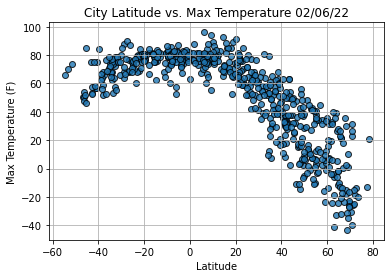

In [39]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

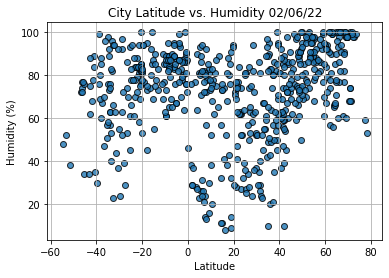

In [40]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

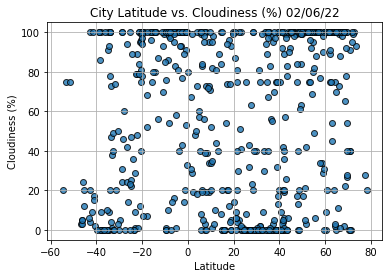

In [41]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


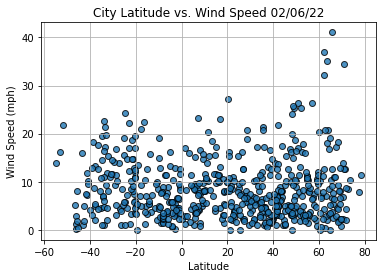

In [42]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()